c:\Users\Malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

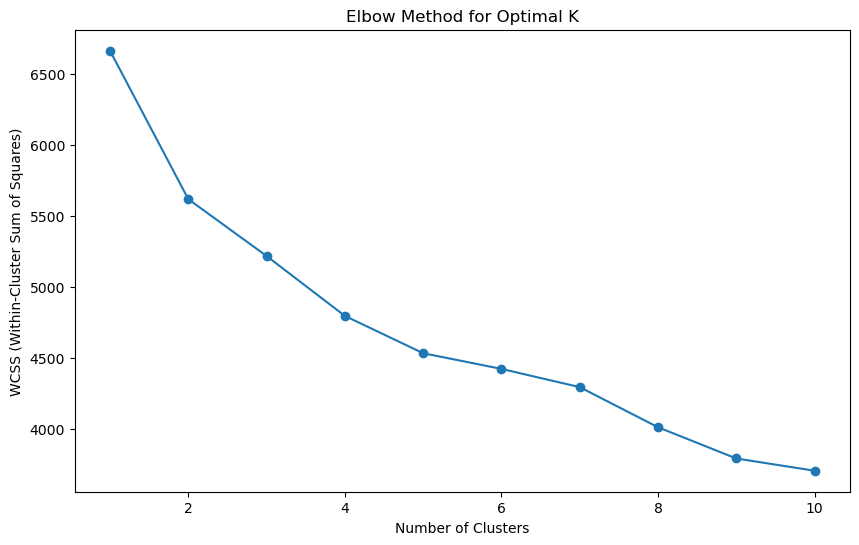

c:\Users\Malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


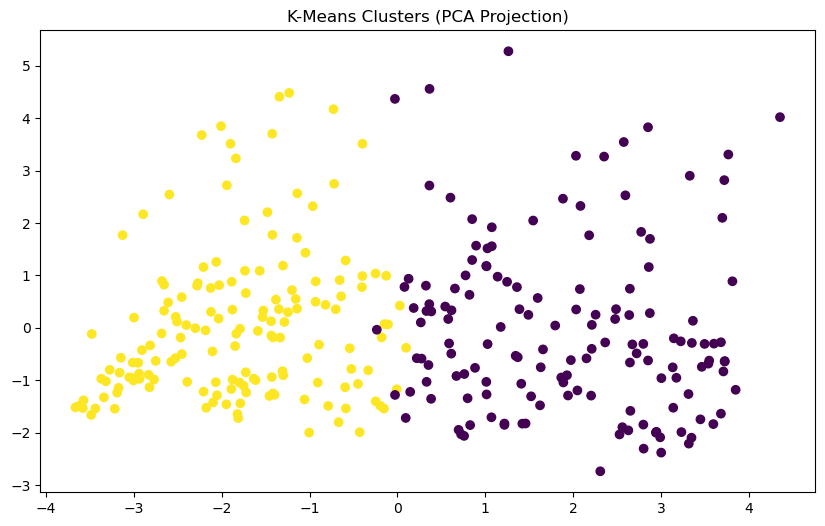

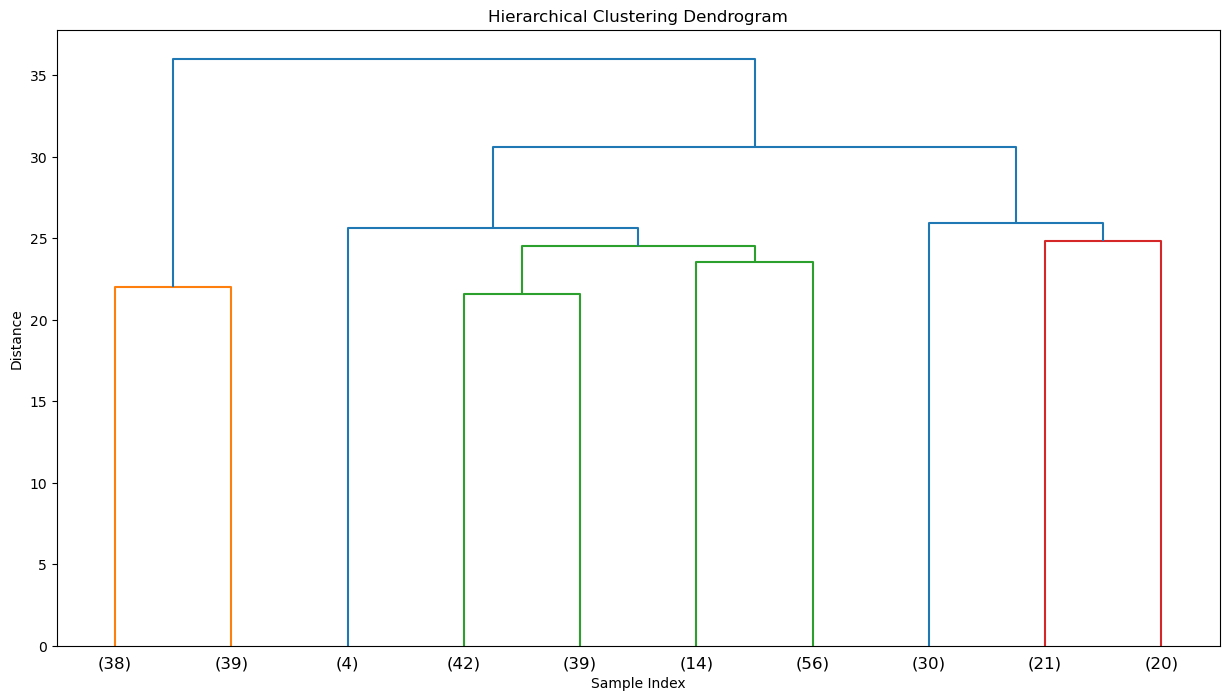

K-Means vs. Actual Labels:
target    0    1
row_0           
0        37  110
1       127   29

Hierarchical vs. Actual Labels:
target   0    1
row_0          
0       96  130
1       68    9

Adjusted Rand Score (K-Means): 0.32
Adjusted Rand Score (Hierarchical): 0.09


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load cleaned data
cleaned_df = pd.read_csv("D:\AI & ML Sprints\data\cleaned_heart_disease.csv")
X = cleaned_df.drop('target', axis=1)
y = cleaned_df['target']  # Actual labels for comparison

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================================
# 1. K-Means Clustering (Elbow Method)
# ===========================================
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.savefig('D:/AI & ML Sprints/results/kmeans_elbow.png')
plt.show()

# Optimal K (K=2 for heart disease presence/absence)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize Clusters (using PCA for 2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters (PCA Projection)')
plt.savefig('D:/AI & ML Sprints/results/kmeans_clusters.png')

# ===========================================
# 2. Hierarchical Clustering (Dendrogram)
# ===========================================
# Compute linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('D:/AI & ML Sprints/results/hierarchical_dendrogram.png')
plt.show()

# Fit hierarchical clustering (2 clusters)
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# ===========================================
# 3. Compare Clusters with Actual Labels
# ===========================================
# Compare K-Means with actual labels
print("K-Means vs. Actual Labels:")
print(pd.crosstab(kmeans_labels, y))

# Compare Hierarchical with actual labels
print("\nHierarchical vs. Actual Labels:")
print(pd.crosstab(hierarchical_labels, y))

# Metrics (if ground truth is available)
print(f"\nAdjusted Rand Score (K-Means): {adjusted_rand_score(y, kmeans_labels):.2f}")
print(f"Adjusted Rand Score (Hierarchical): {adjusted_rand_score(y, hierarchical_labels):.2f}")

# Save clustering results
np.savetxt('D:/AI & ML Sprints/results/kmeans_labels.txt', kmeans_labels)
np.savetxt('D:/AI & ML Sprints/results/hierarchical_labels.txt', hierarchical_labels)